/tmp/ipykernel_8228/2113654509.py:13: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  c['part'] = c['part'].str.rsplit(' ', 1).apply(lambda x: f'{x[-1]} ({x[0]})' if len(x)>1 else x[0])


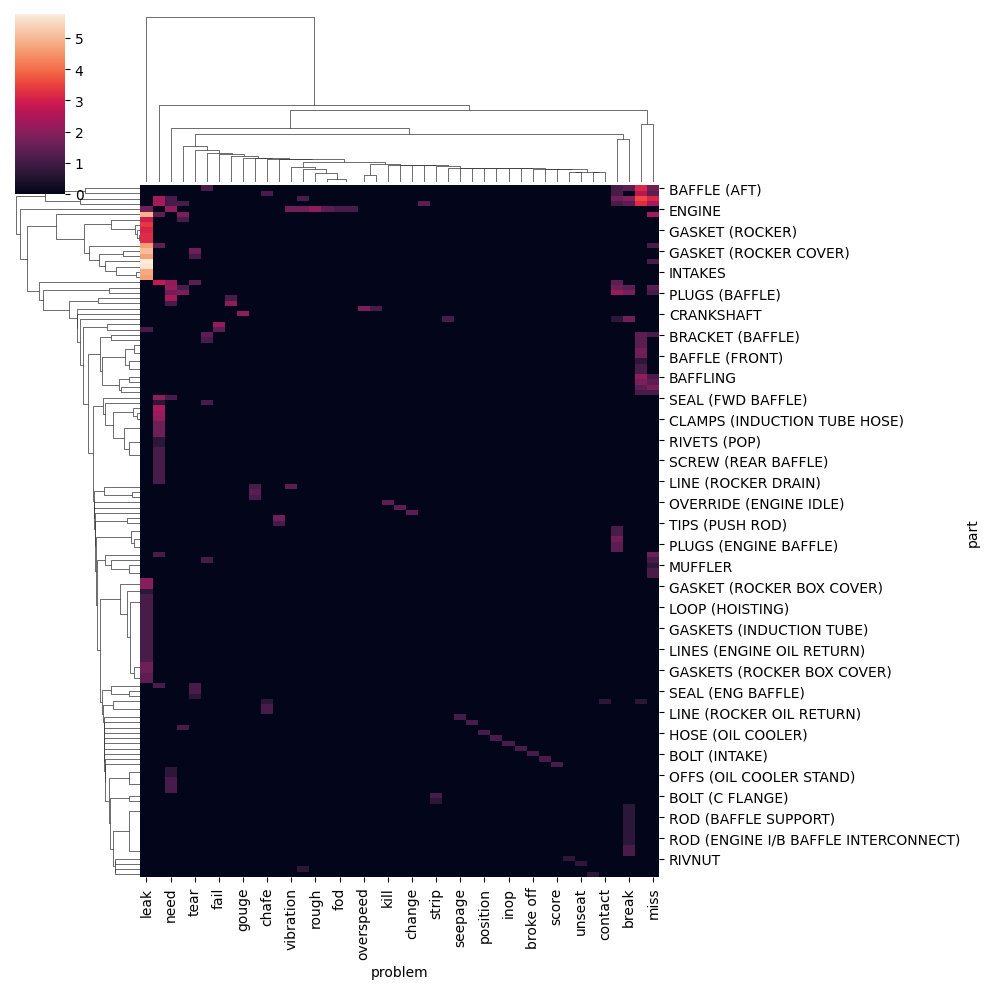

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.stem import WordNetLemmatizer
 
# problem_extractions = pd.read_csv('problem_extractions_regex.csv')
# problem_extractions = pd.read_csv('problem_extractions_chatgpt.csv')
problem_extractions = pd.read_csv('problem_extractions_chatgpt_2.csv')

lemmatizer = WordNetLemmatizer()
c = problem_extractions[['part','problem']].fillna('')
c = c[c['part'] != '']
c['part'] = c['part'].str.rsplit(' ', 1).apply(lambda x: f'{x[-1]} ({x[0]})' if len(x)>1 else x[0])
c['problem'] = c['problem'].apply(lambda p: lemmatizer.lemmatize(p.lower(), pos='v'))
c = c.value_counts()
m = c.head(200).unstack().fillna(0)

import seaborn as sns
sns.clustermap(np.log1p(m))


In [7]:
parts = problem_extractions['part'].value_counts().head(100).index.dropna()
tree = pd.Series(parts).str.rsplit(' ', 1).apply(lambda x: (x[-1], x[0]) if len(x)>1 else (x[0], ''))

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tree = tree.apply(lambda x: (lemmatizer.lemmatize(x[0].lower(), pos='n').upper(), x[1].strip()))

tree_count = pd.Series(list(problem_extractions['part'].value_counts().head(100)), index=pd.MultiIndex.from_tuples(tree))

sort = tree_count.groupby(level=0).transform('first').sort_values(ascending=False).index
tree_count[sort].head(50).rename('count').to_frame()

/tmp/ipykernel_8228/2205268089.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  tree = pd.Series(parts).str.rsplit(' ', 1).apply(lambda x: (x[-1], x[0]) if len(x)>1 else (x[0], ''))


count
INTAKE                     322
                           119
                           322
                           119
       AIR                   2
GASKET INDUCTION TUBE       24
       ROCKER COVER        171
       ROCKER COVER        106
       CARB INLET            2
       ROCKER COVER        171
       ROCKER COVER        106
       INTAKE              292
       INTAKE              104
       CYL INTAKE            2
       ROCKER BOX COVER      6
       ROCKER BOX COVER      4
       INTAKE              292
       INTAKE              104
       INTAKE TUBE          23
       INTAKE TUBE           6
       ROCKER BOX COVER      6
       ROCKER BOX COVER      4
       ROCKER               28
       ROCKER               21
       ROCKER               28
       ROCKER               21
       INTAKE TUBE          23
       INTAKE TUBE           6
COVER  ROCKER BOX            5
       ROCKER              157
       ROCKER              108
       ROCKER              157
       ROCKER              108
BAFFLE UPPER                 3
       CYL                   9
       FRONT                 5
       BACK                  6
       AFT                  42
       REAR                  5
                            91
       ENG                   7
       FWD                  26
       ENGINE               64
       SIDE                 10
       REAR ENGINE           3
       INTERCYLINDER         3
       CYLINDER              3
       ENGINE COOLING        5
ENGINE                      41
SEAL   BAFFLE               34